# 7.1 - Forward Kinematics
p.255 - 278

A 6 degrees of freedom (DoF) general-purpose industrial manipulator, SCARA robot with 4 DoF (typically used for electronic assmebly), and a gantry robot where the arm moves along an overhead rail are serial-link manipulators and comprise a series of rigid links connected by actuated joints.

> A serial-link manipulator is the most common industrial robot. They are designed as a series of links connected by motor-actuated joints that extend from a base to an end-effector. Often they have an anthropomorphic arm structure described as having a "shoulder", an "elbow", and a "wrist".

Each joint controls the relative pose of the two links it connects, and the pose of the end effector is a function of all the joints. A series of links and joints is a kinematic chain or a rigid-body chain. Most industrial robots have 6 joints but increasingly we are seeing robots with 7 joints which enables greater dexterity and a larger usable workspace.

> **In mechanism theory, all these joints are collectively known a lower pairs and involve contact between two surfaces. Higher pairs involve contact between a point and a surface or a line and a surface.**

In robotics, the most common type of joint is revolute, wher eone link rotates relative to another, about an axis fixed to both. Less common is a prismatic joint, also known as a sliding or telescopic joint, wehre one link slides relative to another along an axis fisxed to both. Many other types of joint are possible such as screw joints (1 DoF), cylindrical joints (2 DoF, one revolute and one prismatic) or spherical joints (3 DoF) but they are rare in robotics and will not be discussed here.

We are interested in understanding the relationship between the joints, which we control, and the pose of the end effector which does the work. This is the forward kinematics, a mapping from joint coordinates, or robot configuration, to end-effector pose.

## 7.1.1 - Forward Kinematics from a Pose Graph

In this section, we apply our knowlegde of pose graphs to solve the forward kinematics problem for robots that move in 2D and 3D.

### 7.1.1.1 - 2-Dimensional (Planar) Robotic Arms

We will start simply wiht a single kinematic chain operating in the plane. Consider the following example, which comprises one revolute joint and one link and is somewhat like the hand of a clock:

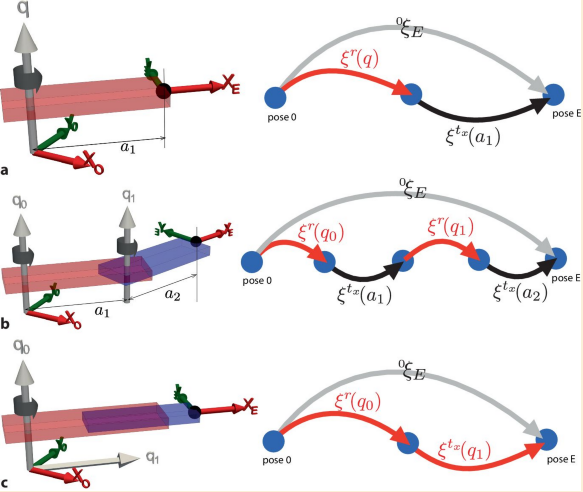

The pose graph depicts the composition of two relative poses. The difference to the pose graphs (discussed in 2.1.3) is that one arrow is a function of a joint variable and is shown in red. The arrows represent, in order, a rotation by the joint angle *q* and then a fixed translation in the *x*-direction by a distance $ a_1 $. The pose of the end effector is simply

\begin{align*}
    \space^0 \vec{\xi}_E =  \vec{\xi}^r(q) \oplus \vec{\xi}^{t_x}(a_1)
\end{align*}

where relative pose $ \xi $ is written as a function with a parameter which is either a variable (*q*) or a constant (*$ a_1 $*). The superscript indicated the specific function: $ \xi^r $ is a relative pose that is a planar rotation and $ \xi^{t_x} $ is a relative pose that is a planar translation in the *x*-direction.

Using the Toolbox, we represent this by an elementary transformation sequence (ETS). We create this by composing two elementary transformations which, for the 2-dimensional case, are created by methods of the `ET2` class. We use * to denote composition since $ \oplus $ is not a Python operator. The result is a 2D elementary transformation sequence encapsulated in an `ETS2` instance, a list-like object that contains two rigid-body transforms: one variable and one constant. The variable transformation is created by the method with no arguments, while the constant corresponds to the method with one argument - a constant numeric robot dimension, in this case, equal to one.

In [ ]:
# This imports our RVC Textbook with it's tools
import RVC3 as rvc
import sys, os.path
sys.path.append(os.path.join(rvc.__path__[0], 'examples'))

import numpy as np
from scipy import linalg, stats
import matplotlib.pyplot as plt
import math
from math import pi
np.set_printoptions(
    linewidth=120, formatter={
        'float': lambda x: f"{0:8.4g}" if abs(x) < 1e-10 else f"{x:8.4g}"})
np.random.seed(0)
from machinevisiontoolbox.base import *
from machinevisiontoolbox import *
from spatialmath.base import *
from spatialmath import *
from roboticstoolbox import *

In [ ]:
# ets
a1 = 1
e = ET2.R() * ET2.tx(a1)

len(e)

e

When the object is displayed we see that the empty parentheses have been replaced with `q` to make it clear that it represents a joint variable rather than a constant. The $ \oplus $ symbol reminds us that this is a relative pose resulting from compounding two elementary motions.

For a particular value of the joint variable, say $ q = \frac{\pi}{6} $ radians, the end-effector pose is 

In [ ]:
e.fkine(pi / 6)

which is `SE2` object computed by composing the two relative poses in the ETS. The argument to `fkine` is substituted for the joint variable in the expression and is equivalent to

In [ ]:
SE2.Rot(pi / 6) * SE2.Tx(a1)

which is the forward kinematics for our very simple robot.

An easy and intuitive way to understand how this simple robot behaves is by

In [ ]:
e.teach()

which generates an interactive graphical representation of the robot arm as shown. As we adjust the joint angle using the slider, the arm's shape changes and the end-effector position and oreintation are updated. This is not a particularly useful robot arm since its end effector can only reach points that lie on a circle.

Consider now the robot shown in the image above which has two revolute joints $ q_0 $ and $ q_1 $. From the pose graph, the pose of the end effector is 

\begin{align*}
    \space^0\xi_E = \xi^r(q_0) \oplus \xi^{t_x}(a_1) \oplus \xi^r(q_1) \oplus \xi^{t_x}(a_2)
\end{align*}

Using the Toolbox, we write:

In [ ]:
a1 = 1;  a2 = 1;
e = ET2.R() * ET2.tx(a1) * ET2.R() * ET2.tx(a2);

e

When the object is displayed, we see that the empty parentheses have been replaced with sequential joint variables $ q_0 $ and $ q_1 $. We can evaluate this expression for specific joint angles, in this case given in degrees. The result is the end-effector pose when $ q_0 = 30\degree $ and $ q_1 = 40\degree $. This is equivalent to:

In [ ]:
e.fkine(np.deg2rad([30, 40])).printline()

T = SE2.Rot(np.deg2rad(30)) * SE2.Tx(a1) * SE2.Rot(np.deg2rad(40)) * SE2.Tx(a2);
T.printline()

The `ETS2` object has many methods. We can find the number of joints, and the ET elements in the sequence that are joints. The joint structure of a robot is often given in a shorthand notation comprising the letters R (for revolute) or P (for prismatic) to indicate the number and types of its joints. The kinematic chain below indicates a revolute-revolute sequence of joints. WE could display the robot interactively as in the previous example, or noninteractively, by plotting it.

In [ ]:
# find the joints
e.n
e.joints()

# find the structure
e.structure

# plot
e.plot(np.deg2rad([30, 40]));

The `ETS2` object also acts like a list. We can slice it and the single element will have a number of methods, which return respectively, the transformation constant $ \eta $ passed to the constructor, $ a_1 $ in this case, and the corresponding SE(2) matrix which in this case represents a translation of 1 in the x-direction.

This simple planar robot arm has some interesting characteristics. Firstly, most end-effector positions can be reached with two different sets of joint angles. Secondly, the robot can position the end effector at any point within its reach but cannot achieve an arbitrary orientation as well.

> This is a real interval since the joint length will have a minimum and maximum possible value.

We describe the configuration of a robot manipulator with *N* joints by a vector of generalized coordinates where $ \vec{q}_j \in \vec{S}^1 $ is an angle for a revolute joint or $ \vec{q}_j \in \Re $ is a length for a prismatic joint. We refer to $ \vec{q} $ as the *joint configuration* or *joint coordinates* and for all-revolute robot as the *joint angles*. **This is sometimes, confusingly, referred to as the pose of the manipulator, but in the book we use the term pose to mean $ \xi $ the position and orientation of a body in space.**

In [ ]:
e[1]
e[1].eta
e[1].A()

Recalling the discussion from Section 2.4.9, this robot has 2 degrees of freedom and its configuration space is $ \zeta \in \vec{S}^1 \times \vec{S}^1 $ and $ \vec{q} \in \zeta $. This is sufficient to reach points in the task space $ \tau \subset \Re^2 $ since $ \dim\zeta = \dim\tau $. However, if our task space includes orientation $ \tau \subset \Re^2 \times \vec{S}^1 $ then it is underactuated since $ \dim\zeta < \dim\tau $ and the robot can access only a subset of the task space, for example, positions but not orientation.

> For a prismatic joint, we need to specify the range of motion `qlim` so that the `teach` method can determine the dimensions of the plot surface and the scale of the slider. Unless otherwise specified, revolute joints are assumed to have a range $ [-\pi,\pi) $.

To finish up the robot shown in the image above, which includes a prismatic joint, it is commonly called a polar-coordinate robot arm. The end effector pose is

\begin{align*}
    \space^0\xi_E = \xi^r(q_0) \oplus \xi^{t_x}(q_1)
\end{align*}

Using the Toolbox, we can see this shown and like previous objects, it has `fkine`, `teach`, and `plot` methods.

In [ ]:
e = ET2.R() * ET2.tx(qlim=[1, 2])
e.structure

We could easily add more joints and use the now familiar Toolbox functionality to explore the capability of robots we create. A robot with 3+ revolute joints is able to access all points in the task space $ \tau \subset \Re^2 \times \vec{S}^1 $, that is, achieve any pose in the plane (limited by reach).

> A serial-link manipulator with *N* joints numbered from o to *N* - 1, has *N* + 1 links, numbered from o to N. Joint *j* connects link *j* to link *j* + 1 and moves them relative to each other. Link *l* connects joint *l* - 1 to joint *l*. Link o is the base of the robot, typically fixed, and link *N*, is the lat link of the robot and carries the end effector or tool.

### 7.1.1.2 - 3-Dimensional Robotic Arms

Most real-world robot manipulators have a task space $ \tau \subset \Re^3 \times (\vec{S}^1)^3 $ which allows arbitrary position and orientation of the end effector within its 3D working envelope or workspace. This requires a robot with a configuration space $ \dim\zeta \geq \dim\tau $ which can be achieved by a robot with 6+ joints. Using the 3D version of the code example from the previous section, we can define a robot that is a simplified human arm which has 2 DoF spherical shoulder joint (line 2); an upper-arm, elbow joint, and lower-arm (line 3); and a 3 DoF spherical wrist joint which is a ZYZ Euler angle sequence (line 4). `e` is an `ETS` object, the 3D version of `ETS2`, which supports the same methods as `ETS2` used in the previous section and the end-effector pose for all zero joint angles is as follows which is an `SE3` instance.

In [ ]:
a1 = 1;  a2 = 1;
e = ET.Rz() * ET.Ry() * ET.tz(a1) * ET.Ry() * ET.tz(a2) * ET.Rz() * ET.Ry() * ET.Rz();

e.n
e.structure

e.fkine(np.zeros((6, )))

## 7.1.2 - Forward Kinematics as a Chain of Robot Links

The bulk of a robot's physical structure is due to its links and these dictate its shape and appearance, as well as having important properties such as mass, inertia, and collision potential.

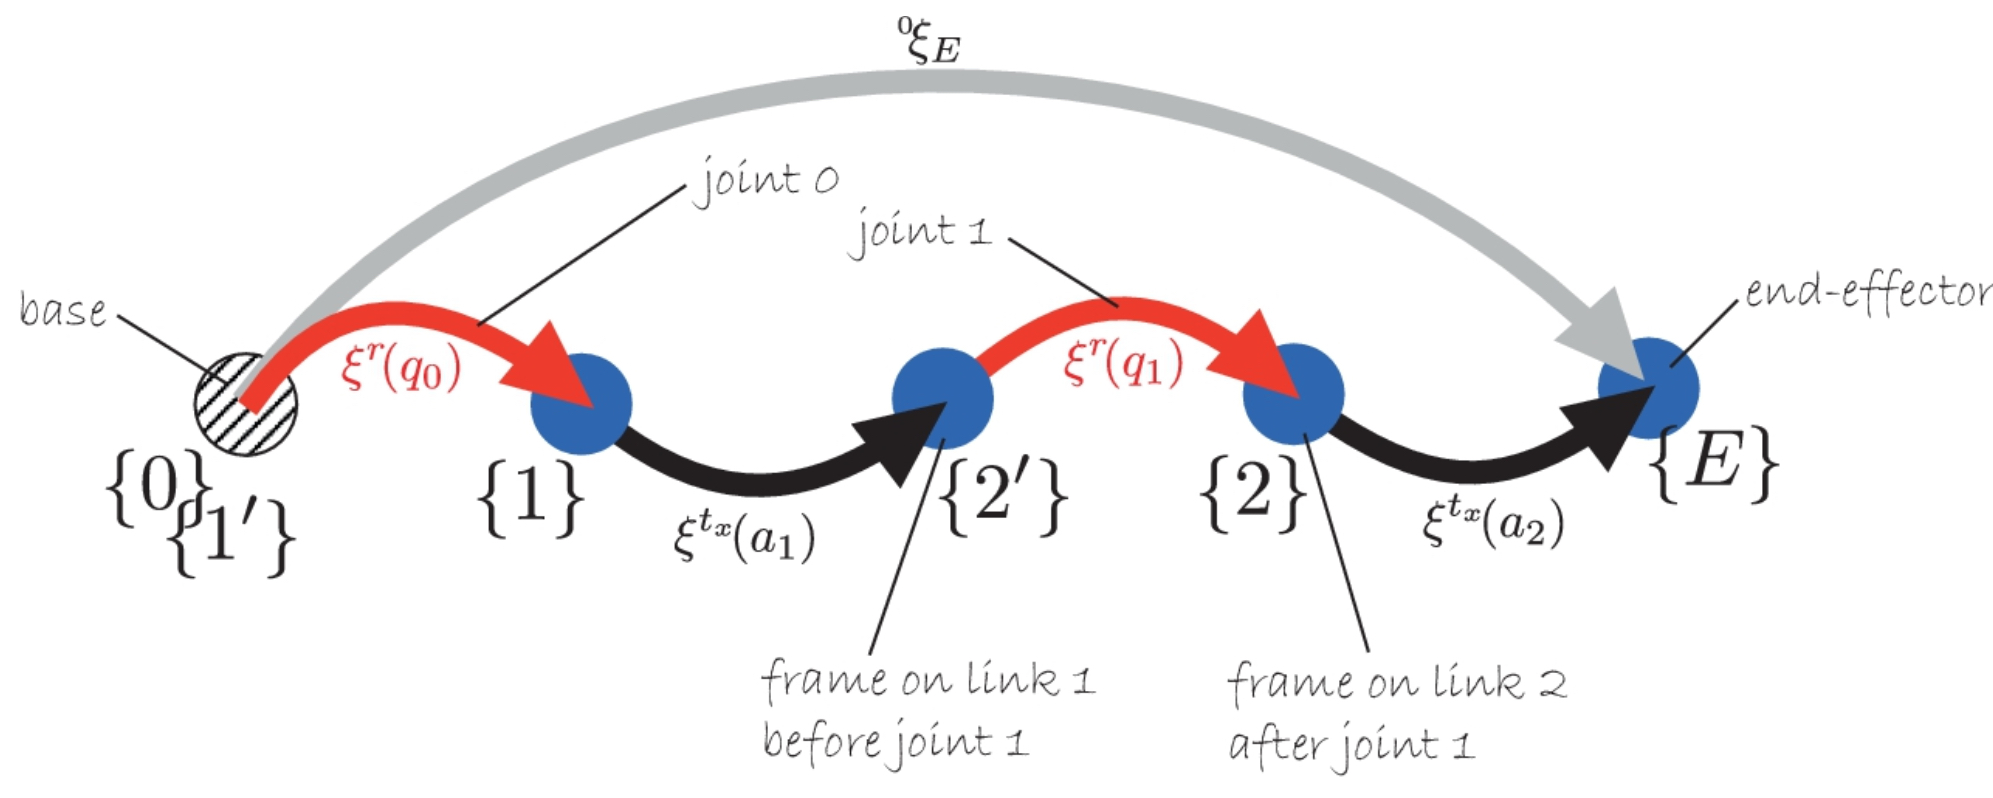

The image above shows the relationship between joints and link frames. The frame for link *l* is indicated as {*l*} and its pose is a function of the joint coordinates {$ q_j, j \in [0, l) $}. We say that the link *l* is the parent of link *l* + 1 and the child of link *l* - 1. The fixed base is considered to be link o and has no parent, while the end effector has no child. The pose of the end effector, the forward kinematics is $ \space^0\xi_N = \space^0\xi_1(q_0) \oplus \space^1\xi_2(q_1) \oplus ... \oplus \space^{N - 1}\xi_N(q_{N - 1}) $ where $ \space^j\xi_{j + 1}(q_j) $ is the pose of link frame {*j* + 1} with respect to link frame {j}. We can write this in functional form as $ \space^0\xi_N = K(\vec{q}) $ where $ K(\cdot) $ is specific to the robot and incorporates the joint and link parameters.

### 7.1.2.1 - 2-Dimensional (Planar) Case

We consider again the robot from Section 7.1 and rigidly attach a coordinate frame to each link as shown below. The pose of the link 1 frame depends only on $ q_0 $ while the pose of the link 2 frame depends on $ q_0 $ and $ q_1 $.

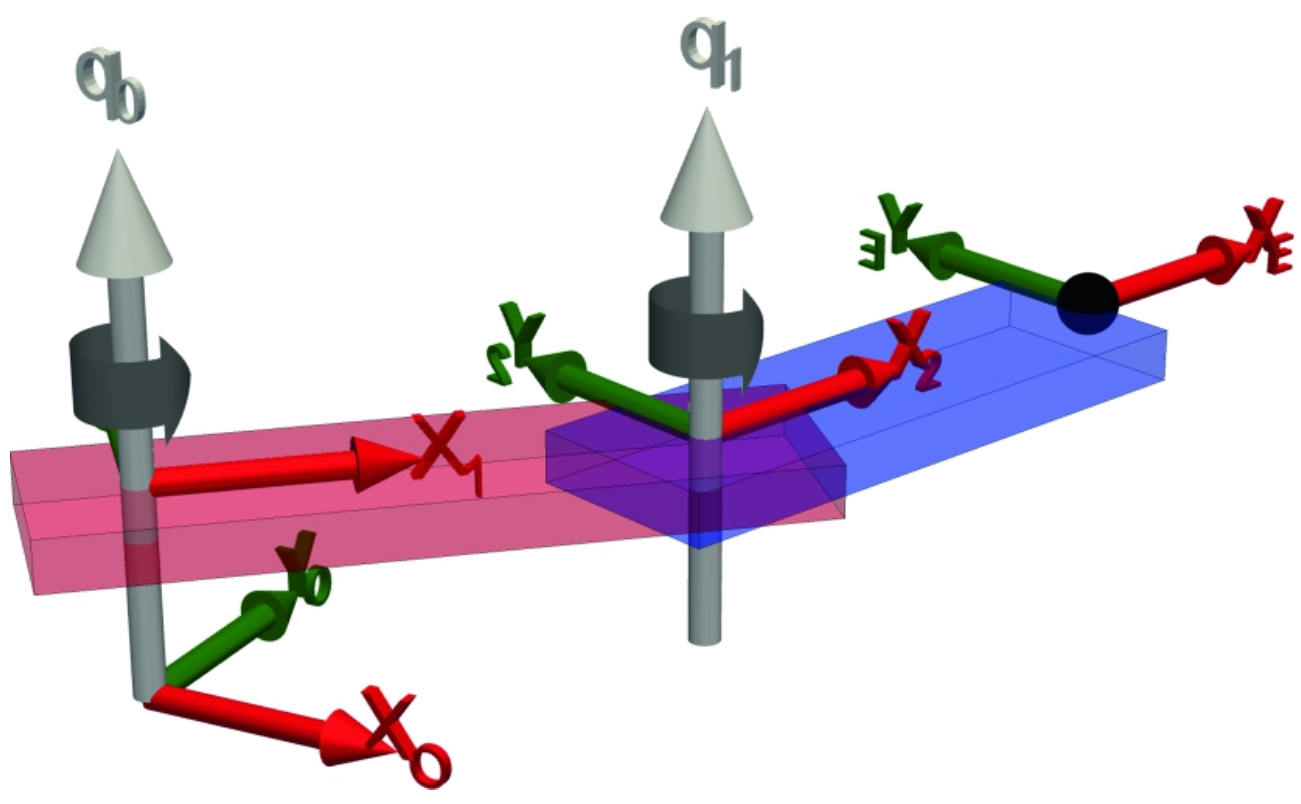

We can describe the robot in a link-centric way by

In [ ]:
a1 = 1;
a2 = 1;
link1 = Link2(ET2.R(), name="link1");
link2 = Link2(ET2.tx(a) * ET2.R(), name="link2", parent=link1);
link3 = Link2(ET2.tx(a2), name="link3", parent=link2);

This creates instances of `Link2` objects. Each constructor is passed a transformation from the parent's link frame to its own frame, a reference to its parent link, and an optional name. The transformation is described using an ETS and can include at most one joint variable, which if present, must be last in the sequence. In the example above, we have also created a link frame for the end effector which has a constant transformation with respect to its parent. We pass a list of these links object constructor and its display shows the rich structure we have created.

> In the Python or IPython console that line is colored blue to indicate that it has a fixed transformation with respect to its parent

At the top of the table we see the class type, the robot's name, the number of joints, and the joint structure. The @ symbol indicates a link frame that is also an end effector - it has no child links. The right-hand column shows the elementary transforms associated with this link. Sequential joint numbers have been assigned, starting at zero. This describes a kinematic chain, a sequence of rigid bodies and joints. This robot subclass object has many methods. Forward kinematics returns an `SE2` instance representing the pose of the `link3` frame. We can plot the robot at this configuration but we can also plot a sequence of joint configuratoins as an animation. The sequence is provided as an array with the rows being consecutive configurations.

In [ ]:
robot = ERobot2([link1, link2, link3], name="my robot")

robot.fkine(np.deg2rad([30, 40])).printline()
robot.plot(np.deg2rad([30, 40]));

q = np.array([np.linspace(0, pi, 100), np.linspace(0, -2 * pi, 100)]).T;
q.shape

robot.plot(q);

The robot object behave like a Python list and can be sliced which returns link 1, or it can be used as an iterator over the robot's links. It also behaves like a dictionary mapping a link name to a link reference. The robot's end effectors are  

In [ ]:
robot[1]
robot["link2"]
robot.ee_links

and in this case there is only one end effector in the returned list.

The link objects also have many methods and properties. We can obtain a reference to its parent link as well as to its children which is a list of links. In this case there is only one child, but for branched robots there can be more. The joint variable for this link has been assigned to $ q_1 $ and we can test the type of joint. `link3` would be neither revolute or prismatic - it is a fixed joint. Joints can have upper and lower limits, but in this case none are set. For forward kinematics an important method is `link2.A(pi / 6)` which is the relative pose of this link's frame with respect to its parent's frame or $ \space^1\xi_2 $. It evalueates the link's ETS for the particular value of *q* passed to the *A* method. Forward kinematics is simply the product of the link transforms from base to tool.

In [ ]:
link2.parent
link2.children
link2.jindex
link2.isrevolute
link2.isprismatic

print(link2.qlim)

link2.A(pi / 6)
link2.ets

### 7.1.2.2 - 3-Dimensional Case

For the 3D case we can create a robot model following a similar pattern but using the `Link, ERobot` and `ETS` classes instead. However, we can take some shortcuts. Firstly, we can create a robot directly from an ETS expression, in this case the example from Setction 7.1.1.2

In [ ]:
a1 = 1; a2 = 1;
robot6 = ERobot(ET.Rz() * ET.Ry() * ET.tz(a1) * ET.Ry() * ET.tz(a2) * ET.Rz() * ET.Ry() * ET.Rz())

The `ERobot` constructor has automatically partitioned the ETS expression and created link objects. WE can now appy familiar methods like `fkine`, `plot`, and `teach`. The second short cut is to use one of the many models included in the Toolbox and these can be listed by

In [ ]:
models.list(type="ETS")

Each model is a subclass of the `ERobot` class. For example, to instantiate a model of the Panda robot is simply

In [ ]:
panda = models.ETS.Panda()

and the format of the first displayed table should be familiar by now. The second table shows some predefined joint configurations named `qr` and `qz` which appear as properties of the robot ojbect. They are simply named joint configurations

In [ ]:
panda.qr

> To make a configuration appear as an attribute of the robot object use `addconfiguration_attr` instead. Note that dynamically adding attributes to objects may confused the Python type checking system in your IDE.

We can add a configuration to this robot instance by

In [ ]:
panda.addconfiguration("foo", [1, 2, 3, 4, 5, 6, 7])

and all cofigurations, predefined or user defined, can be accessed in the configurations dictionary.

We can compute the forward kinematics or plot the robot at a particular named configuration which creates teh simple 3D *noodle* graphics plot.

In [ ]:
panda.configs["foo"];
panda.configs["qz"];

panda.fkine(panda.qr).printline()

panda.plot(panda.qr);

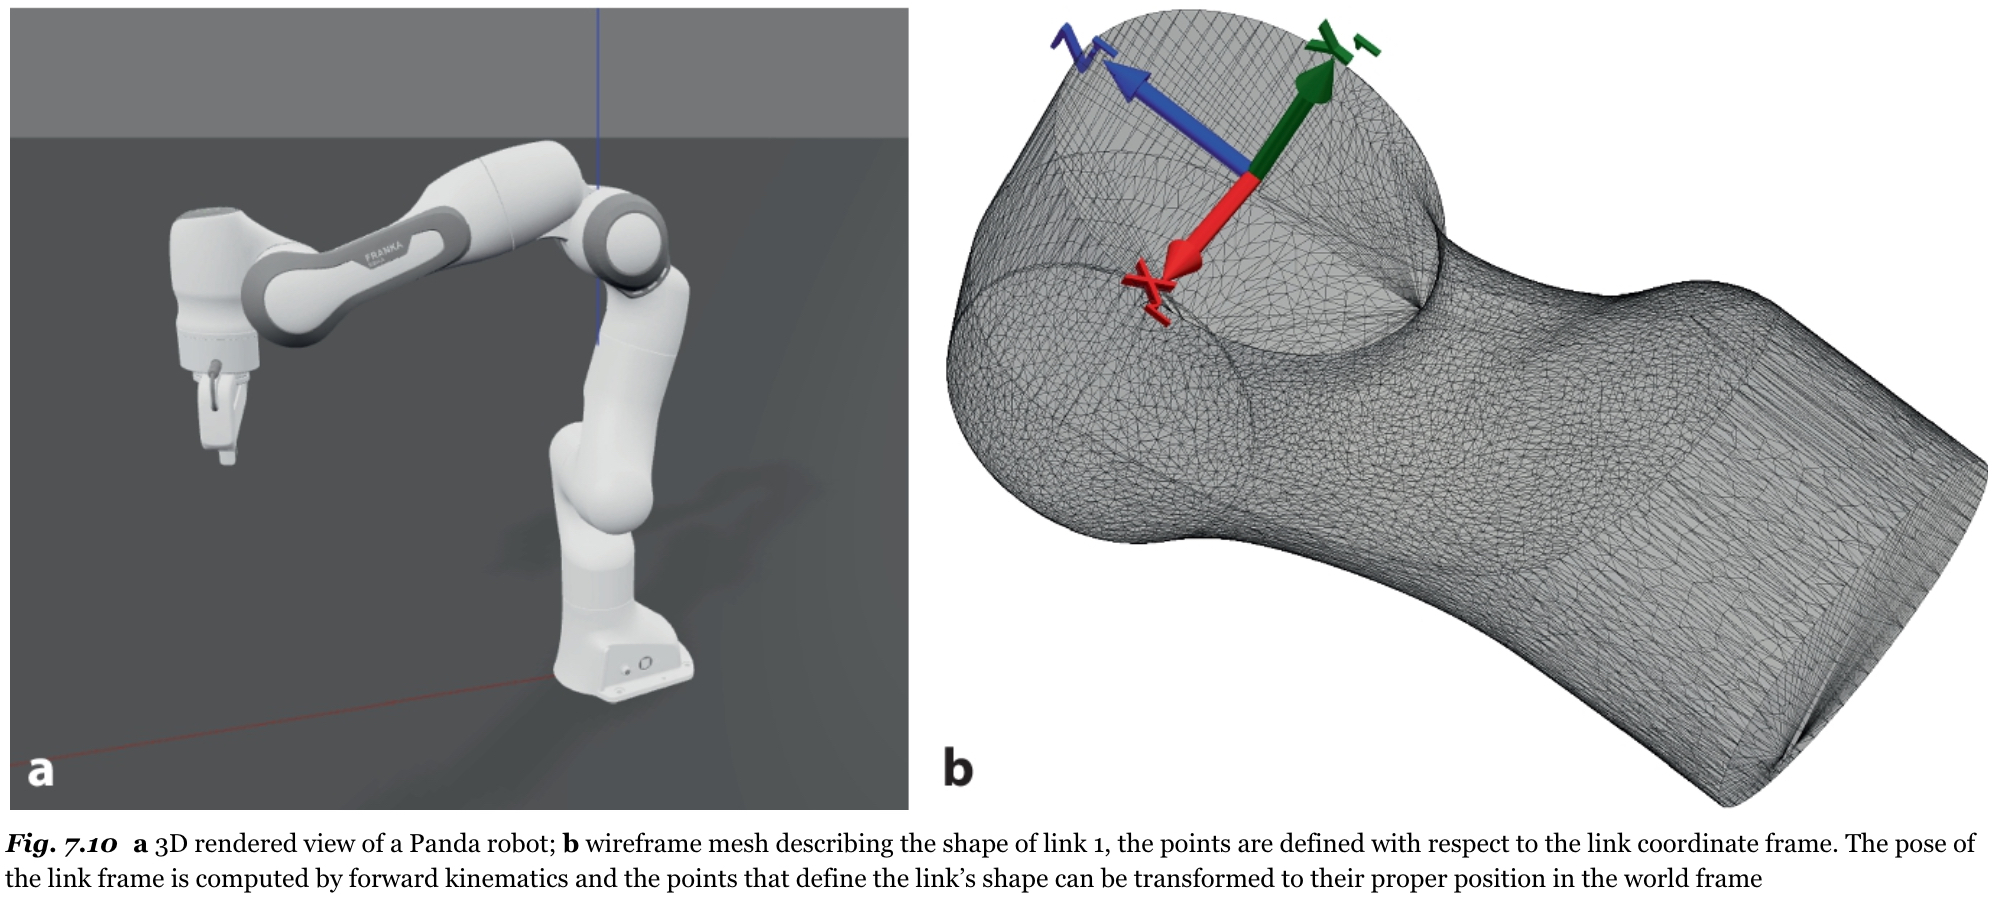

Figure 7.10a shows a more realistic visualization of a Panda robot which we will properly introduce in SEction 7.1.4. Each link is a 3D mesh, as shown in Figure 7.10b, whose verticies are defined with respect to its link frame. Computing the forward kinematics is a sequential process that involves computing the pose of all the intermediate link frames. We can obtain all the link frames with a single method call. The pose of the link 1 frame is 

In [ ]:
T = panda.fkine_all(panda.qr);
len(T)

T[1].printline()

and `T[0]` is the base frame and `T[8]` is the tool frame. Given the pose of a link frame, we can transform all the points in that link's mesh and render it to the screen.

The center of mass (CoM) of the link is defined by a coordinate vector with respect ot the link frame, and the inertia tensor is defined with respect to a coordinate frame parallel to the link frame, but with its origin at the CoM. These parameters are important for modeling the dynamics of the robot which is covered in Chapter 9.

### 7.1.2.3 - Tools and Bases

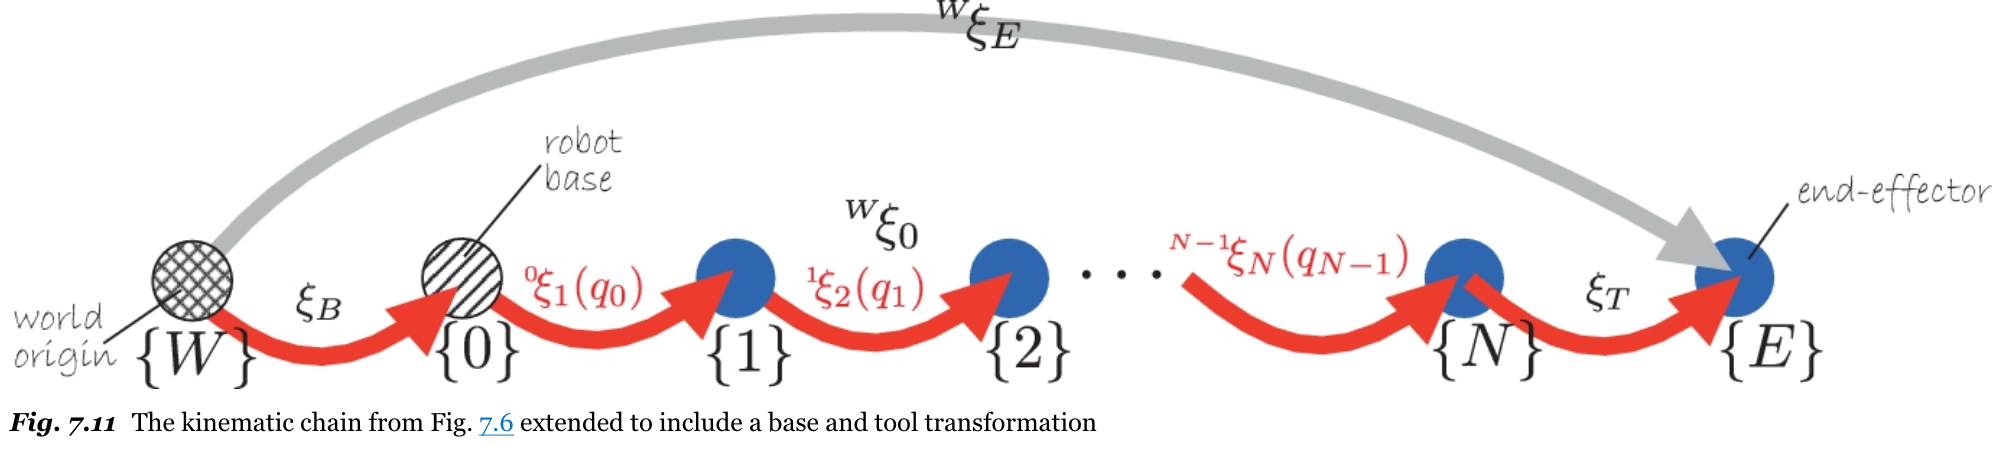

It is useful to extend the forward kinematic expression by adding two extra transforms

\begin{align*}
    \space^W\xi_E = \space^W\xi_0 \oplus \space^0\xi_1 \oplus \space^1\xi_2 \oplus ... \oplus \space^{N - 1}\xi_N \oplus \space^N\xi_E
    \space^W\xi_E = \xi_B \oplus \space^0\xi_1 \oplus \space^1\xi_2 \oplus ... \oplus \space^{N - 1}\xi_N \oplus \xi_T
\end{align*}

Which is shown in the figure above. We have used W to denote the world frame since here p, the base link.

Conventionally, the start of the kinematic chain is the base of the robot, but the base transformation $ \xi_B $ allows us to place the base of the robot at an arbitrary pose within the world coordinate frame. In a manufacturing cell, the robot's base is fixed and defined relative to the cell. If the arm was mounted on a mobile robot the base transformation would be time varying.

There is no standard for kinematic models that dictates where the tool frame {`N`} is physically located on the robot. For a URDF robot model it is likely to be the tool-mounting flange on the physical end of the robot. For a Denavit-Hartenberg model, see Section 7.1.5, it is frequently the center of the spherical wrist mechanism which is physically inside the robot. The tool transormation $ \xi_T $ describes the pose of the tool tip - the bit that actually does the work and sometimes called the tool center point - with respect to frame {`N`}. A strong convention is that the robot's tool points in the z-direction. In practice $ \xi_T $ might vary from application to application, for instance a gripper, a screwdriver or a welding torch, or it might vary within an application if it involves tool changing. It might also consist of several components, perhaps a relative pose to a tool holder and then a relative pose specific to the selected tool.

We can set the default base or tool of any Toolbox robot object:

In [ ]:
panda.base = SE3.Tz(3) * SE3.Rx(pi)    # robot 3m up, hanging down
panda.tool = SE3.Tx(.15);    # tool is 150mm long in the z-direction

To support the possibility of changing tools, the tool transformation can be overridden for a particular case:

In [ ]:
panda.fkine(panda.qr, tool=SE3.TRans(.05, .02, .20) * SE3.Rz(np.deg2rad(45)));

The argument in all cases is an `SE2` or `SE3` object depending on the robot class.

## 7.1.3 - Branched Robots

The simple robots discussed so far have a single end effector, but increasingly we see robots with multiple end effectors.

### 7.1.3.1 - 2D (Planar) Branched Robots

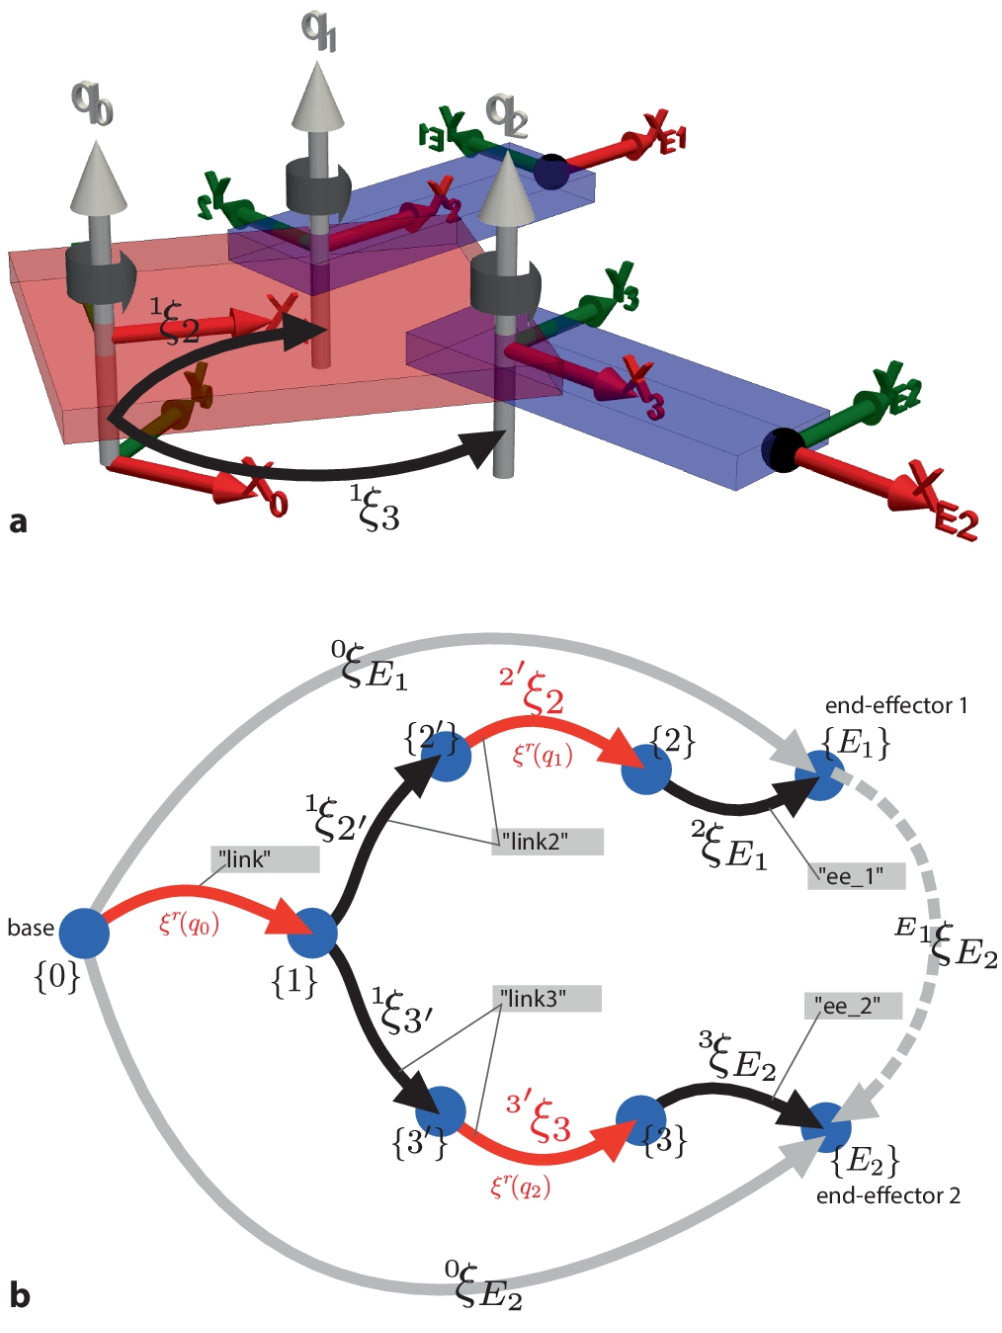

We will illustrate the key points using the planar robot shown in Figure 7.13a, which has two end effectors. Its pose graph is shown in Figure 7.13 and using the Toolbox, we express this as a list of link objects:

In [ ]:
robot = ERobot2()

We see that links named "`link2`" and "`link3`" as their parent. Conversely, the link named "`link1`" has two children.

In [ ]:
robot["link1"].children

robot

Displaying the robot object shows two end effectors - the links designated with the @ symbol. Joint numbers have been sequentially assigned, starting at zero, in depth-first order, from the base to the end of the first branch, and then along the second branch. Joint coordinates are represented by a vector so it is important to understand how elements of that vector map to the joints of a branched robot.

A robot with this structure forms a rigid-body tree and we can display the tree as a graph which is shown below:

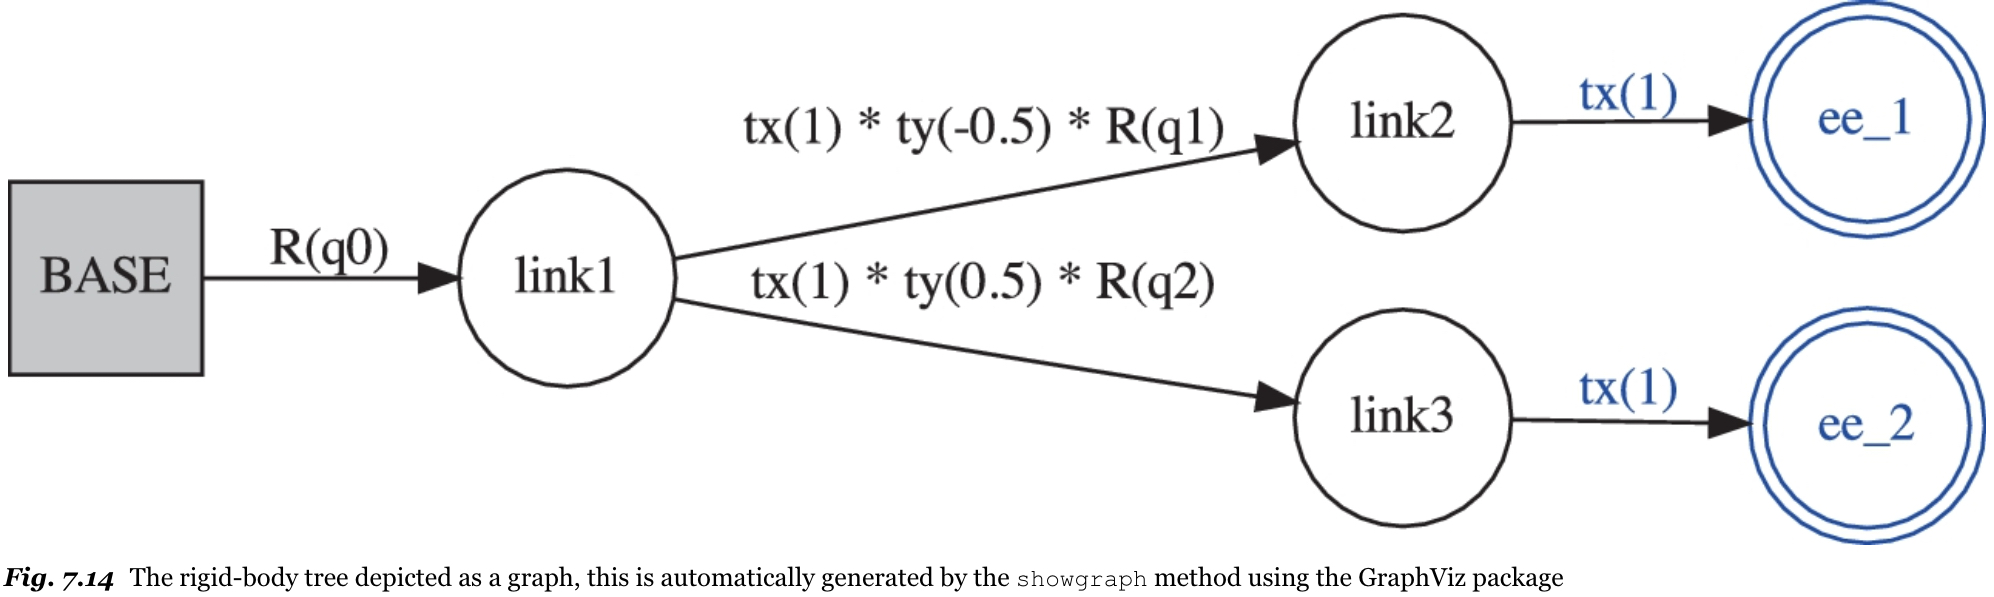

> The end effector can be specified by a reference to the link object or its name as a string.

In [ ]:
robot.showgraph()

robot.teach()
robot.plot([.3, .4, -.6]);

For forward kinematics, we now need to specify which end effector we are interested in and the relative pose {$ EE_2 $} with respect to {$ EE_1 $}, the dashed-gray arrow in Figure 7.13b is simply:

In [ ]:
robot.fkine([.3, .4, -.6], end="ee_2")
robot.fkine([.3, .4, -.6], end="ee_2", start="ee_1")

## 7.1.4 - Unified Robot Description Format (URDF)

> Many URDF files are written using Xacro, with a `.xacro` extension, which is an XML macro language that makes the files shorter and more readable. The Toolbox URDF importer includes an Xacro preprocessor to handle such files.

> If a relative path is given it is first looked for relative to the current folder, and if not found it is looked for relative to the Robotics Toolbox data package, which is installed as part of the Toolbox.

So far we have used code to create rigid-body trees, but that is very specific to the programming language and software tools being used. To enable exchange of models we use URDF which is a portable XML-based file format. The format is widely used and models of many robots can be found online. The Toolbox can parse a URDF file

In [ ]:
urdf, *_ = ERobot.URDF_read("ur_description/urdf/ur5_joint_limited_robot.urdf.xacro")
urdf

which returns a list of link objects initialized with parameters extracted from the URDF file, and the robot's name. Inertial parameters, if present in the file, will be included int he link objects.

> Such as mass (m), center of mass (r), intertia tensor (I), motor inertia (Jm), motor friction (B) and gear ratio (G).

URDF models often represent the gripper fingers as links with their own joint variable - essentially creating a branched robot. In practice, gripper fingers are treated as part of an independent subsystem and not part of the kinematic chian. At most, we would represent the gripper by a fixed distance to the middle of the finger tips - the tool center point - and then open or close the fingers about that point.

The Toolbox provides classes that read URDF files and return models as `Robot` instance subclasses

In [ ]:
ur5 = models.URDF.UR5()

The first line indicateds some key characteristics of the robot including the robot's name, number of joints and joint structure. The robot is described as having branches, even though it is a single kinematic chain. This is a consequence of the way the URDF file was written, and the "branches" can be seen clearly by

In [ ]:
ur5.showgraph()

ur5.grippers    # model also has one gripper

> The mesh files are typically COLLADA (.dae) or STL format (.stl). COLLADA files also contain color and surface texture data which leads to more realistic rendering than for STL files when are geometry only.

The tags at the end of the line above the first displayed table indicate that the model also includes inertial parameters (`dynamics`), 3D geometry of the links (`geometry`), and the collision model (`collision`). The geometry data allows for realistic 3D rendering of the robot. Each link is described by a meshfile which includes the 3D shape and optionally the surface color and texture. If the robot includes geometry data then will display a fully rendered view of the robot inside a new browser tab, rather than a noodle plot. Collision models are simple geometric approximations of the link shape that can be tested for intersection with other objects during simulation, which is discussed in Section 7.5.5.

The intertial parameters can be listed in tabular form where $ m $ is the link's mass, $ r $ is the link's center of mass with respect to the link frame, $ I $ is the unique elements of the symmetric link inertia tensor, $ Jm $ is the motor inertia, $ B $ and $ Tc $ are the viscous and Coulomb friction, and $ G $ is the gear ratio.

In [ ]:
ur5.plot(ur5.qr);
ur5.dynamics()

> The 6 unique elements of the symmetric inertia tensor about the lin's center of mass: $ I_{xx}, I_{yy}, I_{zz}, I_{xy}, I_{yz}, I_{xz} $

**Inertia tensor reference frame: The inertia tensor is defined with respect to the center of mass of the link which is convenient for many dynamics algorithms. URDF files describe inertia with respect to the inertia frame whose origin is at the center of mass. However, this is not a standard and iwll vary across software packages, for instance the software used in the MATLab version of this book stores the inertia with respect to the link frame.**

We conclude this section with an example that builds on many of the concepts we have just covered. We load a model of a 3D branched robot from a URDF file

In [ ]:
yumi = models.URDF.YuMi()

The displayed table indicates that the robot has 14 joints, all revolute, and two end effectors and the link structure. The robot has two grippers each of which has two joints and three links - the links in the rigid-body tree that they attach to are displayed. Joint numbers, discussed earlier, have been assigned in a depth-first order. The robot an be visualized in a browser tab by

In [ ]:
yumi.showgraph(ets="brief")
yumi.grippers

yumi.plot(yumi.q1);

The toolbox provides classes that define many robots based on URDF models shipped with the Toolbox. These classes can be listed by 

In [ ]:
models.list(type="URDF")

One of the most complex models in the Toolbox is the PR2 robot. This has a mobile base, two arms each with a gripper, and a multitude of actuated sensors and comprise 31 joints, 66 links and 27 branches. We can display its kinematic structure in tabular, graph or visual form by

In [ ]:
pr2 = models.URDF.PR2()

pr2
pr2.showgraph()
pr2.plot(pr2.qz)

## 7.1.5 - Denavit-Hartenberg Parameters

From the 1960s, well before the advent of URDF, the way to share a robot model was as simple table of numbers. There is one row per link-joint pair to describe the kinematics of the robot. If known, the inertial parameters of the link can be added as additional columns. This compact notion is known as Denavit-Hartenberg notation. Each row in the table defines the spatial relationship between two consecutive link frames, as shown in the image below. A manipulator with $ N $ joints numbered from 0 to $ N - 1 $ has $ N + 1 $ links, numbered from 0 to $ N $. Joint $ j $ connects to link $ j $ to link $ j + 1 $. It follows that link $ l $ connects joint $ l - 1 $ to joint $ l $. Link 0 is the base of the robot, typically fixed and link $ N $, the last link of the robot, carries the end effector or tool.

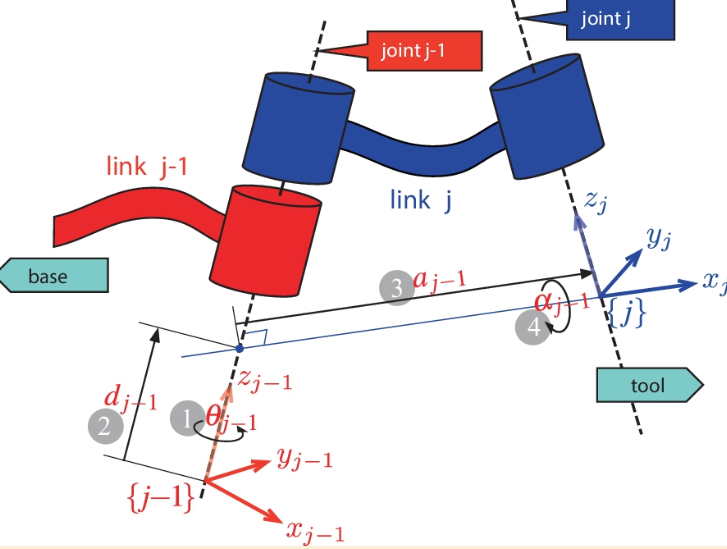

**Denavit-Hartenberg notation with zero-based indexing: This description of Denavit-Hartenberg notation differs from standard textbooks which index the joints and parameters starting from one. This book adopts Pythonic base-zero numbering for joint indexing.**

Each link is described by 4 parameters. The relationship between two link coordinate frames would ordinarily entail 6 parameters, 3 each for translation and rotation. Denavit-Hartenberg notation uses only 4 parameters but there are also 2 constraints: axis $ x_j $ intersects $ z_{j - 1} $ and axis $ x_j $ is perpendicular to $ z_{j - 1} $. One consequence of these constraints is that sometimes the link coordinate frames are not actually located on the physcial links of the robot. Another consequence is that the robot must be placed into a particular configuration - the zero-angle configuration - in order to asign the link frames and this is discussed further in Section 7.5.1. The Denavit-Hartenberg parameters are summarized in the table below.

| Physical Meaning | Symbol | Formal Definition | Type |
|---|---|---|---|
| Joint angle | $ \theta_j $ | The angle between the $ \vec{x}_j $ and $ \vec{x}_{j + 1} $ axes about the $ \vec{z} _{j - 1} $ axis | Revolute joint variable or constant |
| Link offset | $ d_j $ | The distance from the origin of frame {j} to the $ \vec{x}_{j + 1} $ axis along the $ \vec{z}_j $ axis | Constant or prismatic joint variable |
| Link length | $ a_j $ | The distance between the $ \vec{z}_j $ and $ \vec{z}_{j + 1} $ axes along the $ \vec{x}_{j + 1} $ axis; for intersecting axes is parallel to $ \vec{z}_j \times \vec{z}_{j + 1} $ | Constant |
| Link twist | $ \alpha_j $ | The angle from the $ \vec{z}_j $ axis to the $ \vec{z}_{j + 1} $ axis about the $ \vec{x}_{j + 1} $ axis | Constant |
| Joint type | $ \sigma_j $ | $ \sigma = R $ for a revolute joint, $ \sigma = P $ for a prismatic joint. By convention R = 0 and P = 1 | Constant |

The coordinate frame {j} is attached to the far (distal) end of link $ j $. The z-axis of frame {j} is aligned with the axis of joint $ j $. The transformation from link coordinate frame {j} to frame {j + 1} is defined in terms of elementary tranformations as 

\begin{align*}
    \space^j\xi_{j + 1} = \xi^{r_x}(\theta_j) \oplus \xi^{t_z}(d_j) \oplus \xi^{t_x}(a_j) \oplus \xi^{r_x}(\alpha_j)
\end{align*}

which can be expanded as an `SE(3)` matrix

\begin{align*}
    \space^j\vec{A}_{j + 1} = \begin{bmatrix} cos\theta_j & -sin\theta_jcos\alpha_j & sin\theta_jsin\alpha_j & \alpha_jcos\theta_j \\ sin\theta_j & cos\theta_jcos\alpha_j & -cos\theta_jsin\alpha_j & \alpha_jsin\theta_j \\ 0 & sin\alpha_j & cos\alpha_j & d_j \\ 0 & 0 & 0 & 1 \end{bmatrix}
\end{align*}

The parameters $ \alpha_j $ and $ a_j $ are always constant. For a revolute joint, $ \theta_j $ is the joint variable and $ d_j $ is constant, while for a prismatic joint, $ d_j $ is variable and $ \theta_j $ is constant. The generalized joint coordinates are 

\begin{align*}
    q_j =
    \begin{cases} 
      \theta_j ... \sigma_j = R \\
      d_j ... \sigma_j = P 
   \end{cases}
\end{align*}

A revolute robot joint and link can be created by the following:

In [ ]:
link = RevoluteDH(a=1)

> A variant form, *modified* Denavit-Hartenberg notation, is discussed in Section 7.5.3 and would be represented by a `RevoluteMDH` object.

Above is a `RevoluteDH` instance and a subclass of the generic `DHLink` object. The displayed value of the object shows the kinematic and dynamic parameters (most of which have defaulted to zero), and the name implies the joint type (Revolute) and that standard Denavit-Hartenberg (DH) convention is used. A `DHLink` object shares many attributes and methods with the `Link` object we used earlier. For example, the link transformation for $ q = .5 $ rad is an `SE3` object

In [ ]:
link.A(.5)

The forward kinematics is a function of the joint coordinates and is simply the composition of the relative pose due to each link. In the Denavit-Hartenberg representation link o is the base of the robot and commonly for the first link $ d_o = 0 $, but we could set $ d_o > 0 $ to represent the height of the first joint above the world coordinate frame. For the final link, link $ N $, the parameters $ d_{N - 1}, a_{N - 1} $ and $ \alpha_{N - 1} $ provide a limited means to describe the tool-tip pose with respect to the {N} frame. It is common to add a more general tool transformation as described in Section 7.1.2.3.

Denavit-Hartenberg kinematic descriptions of many robots can be found in manufacturer's data sheets and in the literature. They ar every compact compared to a URDF model, and a table of Denavit-Hartenberg parameters is sufficient to cmopute the forward and inverse kinematics and to create a stick figure (*noodle plot*) or animation. Thye can also be used to compute the rigid-body dynamics.

In [ ]:
models.list(type="DH")
irb140 = models.DH.IRB140();

irb140
irb140.fkine(irb140.qr).printline("rpy/xyz")

irb140.plot(irb140.qr);
irb140.teach()